# Pymaceuticals Inc.
---

Analysis

The purpose of the following analysis is to measure the results of Capomulin used  by Pymaceuticals Inc. and the effects on tumor development on mice in comparison to other drugs regimens.  The records analyzed are the effects on the mice on the course of 45 days.
These are some of the conclusions following the data collected:
- A total of 249 mice were studied out of them 50.7% are male mice and 49.3% female.
- When comparing the drug treatments on Capolulin	Ramicane,	Infubinol and Ceftamin both Capomulin and Ramicane have best results sustainded on reducing the size of the tumors on the 45 days period.
- Following drug treatment using Capomulin  on mouse identified as l509 we can see a reduction on the tumor size after day 20.
- The weight seems to be a driver for the tumor volume, considering that every mice should have the same opportunity of gain weight to avoid bias in the research.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
mouse_data_complete.head()
# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = mouse_data_complete["Mouse ID"].unique()
total_of_mice=len(total_mice)
total_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_complete[mouse_data_complete[["Mouse ID","Timepoint"]].duplicated()==True]
duplicate_mice_ID_number = duplicate_mice["Mouse ID"].unique()
duplicate_mice_ID_number

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
data_duplicate_mice=mouse_data_complete.loc[mouse_data_complete["Mouse ID"]==duplicate_mice_ID_number[0]]
data_duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_Dataframe=mouse_data_complete.drop_duplicates(subset=["Mouse ID", "Timepoint"])
Clean_Dataframe.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
Clean_number_of_mice=Clean_Dataframe["Mouse ID"].unique()
total_of_mice_clean=len(Clean_number_of_mice)
total_of_mice_clean


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Drug_regimen=Clean_Dataframe.set_index(["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
group_Drug_regimen=Drug_regimen.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#mean
mean_Drug_regimen=group_Drug_regimen["Tumor Volume (mm3)"].mean()
#median
median_Drug_regimen=group_Drug_regimen["Tumor Volume (mm3)"].median()
#variance
var_Drug_regimen=group_Drug_regimen["Tumor Volume (mm3)"].var()
#Std. Dev
std_Drug_regimen=group_Drug_regimen["Tumor Volume (mm3)"].std()
#SEM (Standar Error of the Mean)
sem_Drug_regimen=group_Drug_regimen["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
Drug_regimen_sum_df=pd.DataFrame({"Mean Tumor Vol":mean_Drug_regimen, 
                                 "Mediam Tumor Vol":median_Drug_regimen,
                                  "Var Tumor Vol":var_Drug_regimen,
                                 "STD. Dev Tumor Vol":std_Drug_regimen,
                                 "SEM Tumor Vol":sem_Drug_regimen,})
Drug_regimen_sum_df.sort_values("Drug Regimen")
Drug_regimen_sum_df

,Mean Tumor Vol,Mediam Tumor Vol,Var Tumor Vol,STD. Dev Tumor Vol,SEM Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
agg_Drug_regimen_sum_df=Drug_regimen.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median",
                                                                                            "var","std","sem"])
# Using the aggregation method, produce the same summary statistics in a single line.
agg_Drug_regimen_sum_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

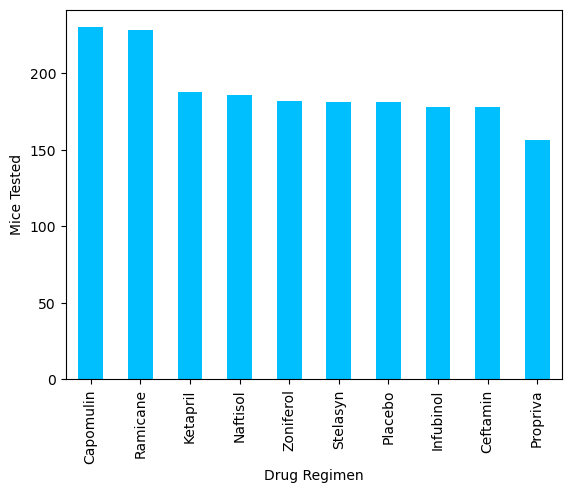

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Generate a data frame with timepoints and drug regimen
Mice_Tested=Clean_Dataframe[["Drug Regimen", "Timepoint"]]
#Mice per Drug
Mice_per_Drug=Mice_Tested["Drug Regimen"].value_counts()
#Bar Plot
Mice_per_Drug.plot(kind="bar",color="deepskyblue",xlabel="Drug Regimen", ylabel="Mice Tested", align="center")
plt.show()

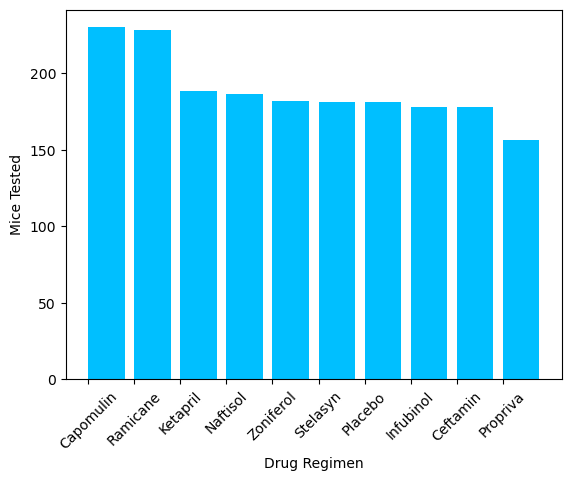

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Generate drug regimen
Regimen=Mice_per_Drug.index.values
#Mice per Drug
Mice_tested=Mice_per_Drug.values
#Bar Plot
plt.bar(Regimen,Mice_tested, color="deepskyblue",align="edge")
#align="center"
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested")
plt.xticks(rotation=45)
#plt.xticks(-0.75,len(Regimen)-0.25)
#plt.xlim(-0.75,len(Regimen)-0.25)
#plt.ylim(0,max(Mice_Tested)+10)
plt.show()

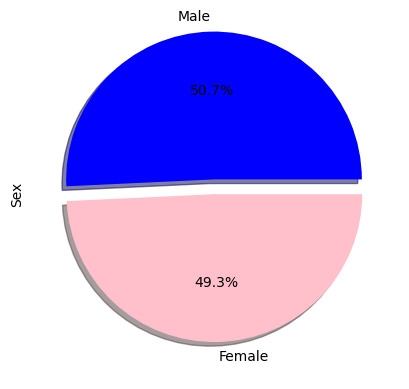

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Split by sex
male_vs_female=Clean_Dataframe["Sex"].value_counts()
Sex_kind=male_vs_female
#Labels
Sex=["Male","Female"]
#Pie Plot
Sex_kind.plot(kind="pie",autopct="%1.1f%%",ylabel="Sex", colors= ["blue","pink"],shadow=True,explode=(0.1,0))
plt.show()



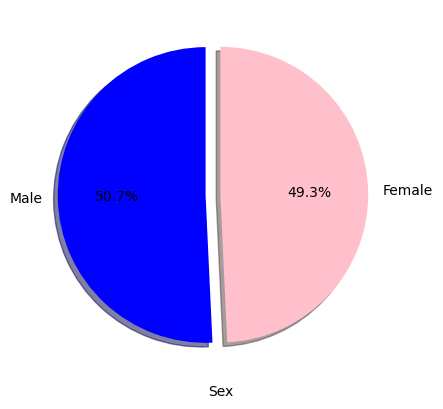

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#label
Label= male_vs_female.index.values
plt.xlabel("Sex")
#ylabel?
#Count
count_value=male_vs_female.values
#Pie Plot
plt.pie(count_value,labels=Label, autopct="%1.1f%%", colors= ["blue","pink"],shadow=True,explode=(0.1,0), startangle=90)
#take out startangle
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
subset_drug_data=Clean_Dataframe.loc[(Clean_Dataframe["Drug Regimen"]=="Capomulin")|
                                    (Clean_Dataframe["Drug Regimen"]=="Ramicane")|
                                    (Clean_Dataframe["Drug Regimen"]=="Infubinol")|
                                    (Clean_Dataframe["Drug Regimen"]=="Ceftamin")]

# Start by getting the last day (greatest) timepoint for each mouse
Greatest_Timepoint=subset_drug_data.groupby(["Drug Regimen", "Mouse ID"]).last()
New_Timepoint=Greatest_Timepoint.reset_index()
#create a data set for each subset drug
Last_Greatest_Timepoint=New_Timepoint[["Drug Regimen","Tumor Volume (mm3)"]]
Last_Greatest_Timepoint
#for each subset of drug
Capomulin=Last_Greatest_Timepoint.loc[Last_Greatest_Timepoint["Drug Regimen"]=="Capomulin"]
Ramicane=Last_Greatest_Timepoint.loc[Last_Greatest_Timepoint["Drug Regimen"]=="Ramicane"]
Infubinol=Last_Greatest_Timepoint.loc[Last_Greatest_Timepoint["Drug Regimen"]=="Infubinol"]
Ceftamin=Last_Greatest_Timepoint.loc[Last_Greatest_Timepoint["Drug Regimen"]=="Ceftamin"]
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Tumor_Dataframe=pd.DataFrame({"Capomulin": Capomulin["Tumor Volume (mm3)"],
                                          "Ramicane":Ramicane["Tumor Volume (mm3)"],
                                          "Infubinol":Infubinol["Tumor Volume (mm3)"],
                                          "Ceftamin":Ceftamin["Tumor Volume (mm3)"]})
Tumor_Dataframe                                         
                                          


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment=[]
for drug in Last_Greatest_Timepoint["Drug Regimen"]:
    #each subset drug
    if drug not in Treatment:
        Treatment.append(drug)
Treatment

# Create empty list to fill with tumor vol data (for plotting)
Tumor_volume=[]
upperq_list=[]
lowerq_list=[]

# interquartile range is IQR
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in Treatment:
    quartiles=Tumor_Dataframe[drug].quantile([.25,.5,.75])
    lowerq=quartiles[.25]
    upperq=quartiles[.75]
    IQR=upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    upperq_list.append(upperq)
    lowerq_list.append(lowerq)
    #print (f"IQR for {drug}:{IQR}")
  
    
    # Determine outliers using upper and lower bounds
    lower_bounds=lowerq-(1.5*IQR)
    upper_bounds=upperq+(1.5*IQR)
    Clean_tumor=(Tumor_Dataframe[drug].dropna())
    Outliers=Clean_tumor[(Clean_tumor<lower_bounds)  |(Clean_tumor>upper_bounds)]
    print(drug,Outliers)
upperq_list
lowerq_list     

Capomulin Series([], Name: Capomulin, dtype: float64)
Ceftamin Series([], Name: Ceftamin, dtype: float64)
Infubinol 55    36.321346
Name: Infubinol, dtype: float64
Ramicane Series([], Name: Ramicane, dtype: float64)


[32.37735684, 48.72207785, 54.04860769, 31.56046955]

Text(0, 0.5, 'Final Tumor Volume (mm3)')

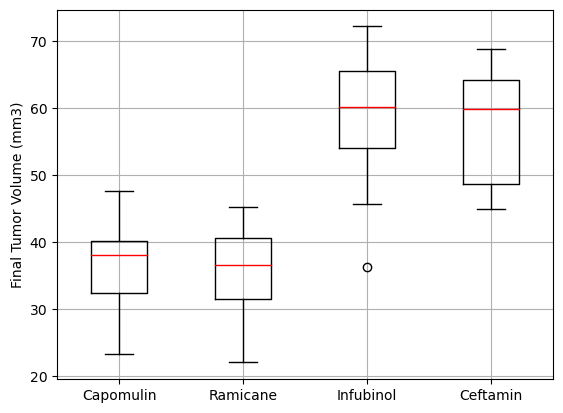

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#orange_out = dict(markerfacecolor='red',markersize=12)
boxplot=Tumor_Dataframe.boxplot(color= dict (boxes="black",whiskers="black", medians="red"))
#outlier marker="o", facecolors="red", edgecolors="black"
boxplot.set_ylabel("Final Tumor Volume (mm3)")


## Line and Scatter Plots

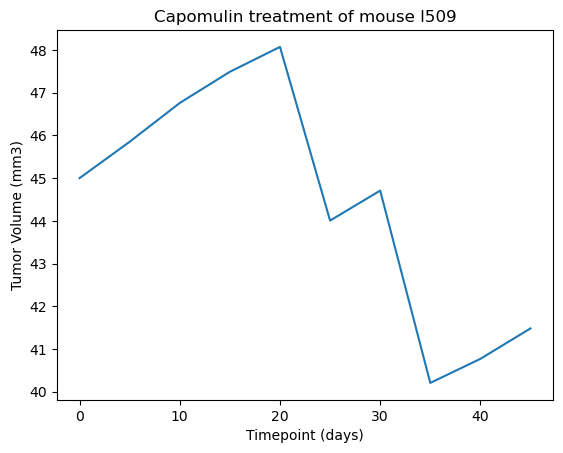

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#mouse with Capomulin treatment l509
Capomulin=Clean_Dataframe.loc[(Clean_Dataframe["Drug Regimen"]=="Capomulin") & (Clean_Dataframe["Mouse ID"]=="l509")]
#Plot data for mouse b128
l509_capomulin=Capomulin[["Timepoint","Tumor Volume (mm3)"]]
l509_capomulin=l509_capomulin.set_index(["Timepoint"])
#How the tumor changed in time
Tumor_volume=l509_capomulin.values
Timepoint=l509_capomulin.index.values
#Line Plot
plt.plot(Timepoint,Tumor_volume)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


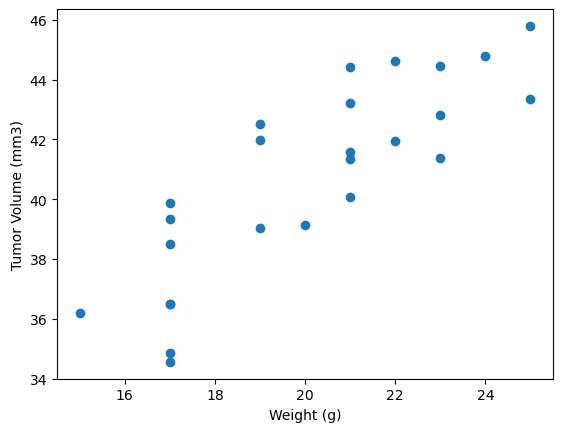

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Mouse_Capomulin=Clean_Dataframe.loc[(Clean_Dataframe["Drug Regimen"]=="Capomulin")]
group_Capomulin=Mouse_Capomulin.groupby("Mouse ID")
#average tumor volume vs. mouse weight
avg_tumor_volume=group_Capomulin[("Tumor Volume (mm3)")].mean()
Weight=group_Capomulin[("Weight (g)")].mean()
avg_Capomulin=pd.DataFrame({"Weight (g)":Weight,"Tumor Volume (mm3)":avg_tumor_volume})
#Scatter plot
plt.scatter(Weight,avg_tumor_volume)
#plt.title("Capomulim treatment of mice")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()







## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


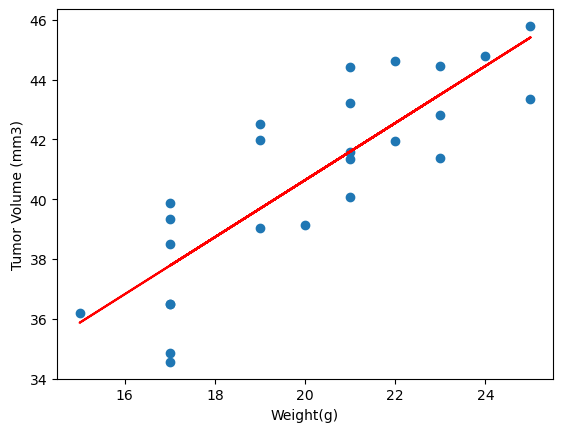

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=st.pearsonr (Weight,avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
#Coeffient model
x_values=avg_Capomulin["Weight (g)"]
y_values=avg_Capomulin["Tumor Volume (mm3)"]
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(Weight,avg_tumor_volume)
#linear regression model
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
#Plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#why r- and not red?
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()




